In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install prophet
from prophet import Prophet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [14]:
df = pd.read_csv('/content/Walmart_Sales.csv')
display(df.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [16]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [17]:
len(df)

6435

In [25]:
df_test=df.tail(819)
df_train=df.head(len(df)-819)

df_train = df_train.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})
df_train['ds'] = pd.to_datetime(df_train['ds'], format='%d-%m-%Y')

df_test = df_test.rename(columns={'Date': 'ds'})
df_test['ds'] = pd.to_datetime(df_test['ds'], format='%d-%m-%Y')

model = Prophet()
model.fit(df_train)

result=model.predict(df_test)
result.head()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,1.098652e+06,388279.061786,1.852899e+06,1.098652e+06,1.098652e+06,19057.204812,19057.204812,19057.204812,19057.204812,19057.204812,19057.204812,0.0,0.0,0.0,1.117710e+06
1,2010-02-05,1.098652e+06,397875.859155,1.853489e+06,1.098652e+06,1.098652e+06,19057.204812,19057.204812,19057.204812,19057.204812,19057.204812,19057.204812,0.0,0.0,0.0,1.117710e+06
2,2010-02-05,1.098652e+06,411655.452741,1.891441e+06,1.098652e+06,1.098652e+06,19057.204812,19057.204812,19057.204812,19057.204812,19057.204812,19057.204812,0.0,0.0,0.0,1.117710e+06
3,2010-02-05,1.098652e+06,372320.715118,1.829162e+06,1.098652e+06,1.098652e+06,19057.204812,19057.204812,19057.204812,19057.204812,19057.204812,19057.204812,0.0,0.0,0.0,1.117710e+06
4,2010-02-05,1.098652e+06,381492.144236,1.850987e+06,1.098652e+06,1.098652e+06,19057.204812,19057.204812,19057.204812,19057.204812,19057.204812,19057.204812,0.0,0.0,0.0,1.117710e+06


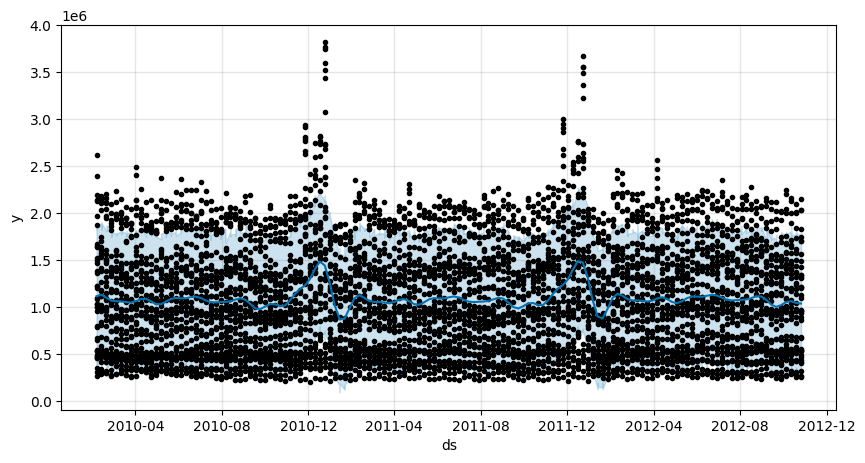

In [27]:
fig,ax=plt.subplots(figsize=(10,5))
fig=model.plot(result,ax=ax)
plt.show()

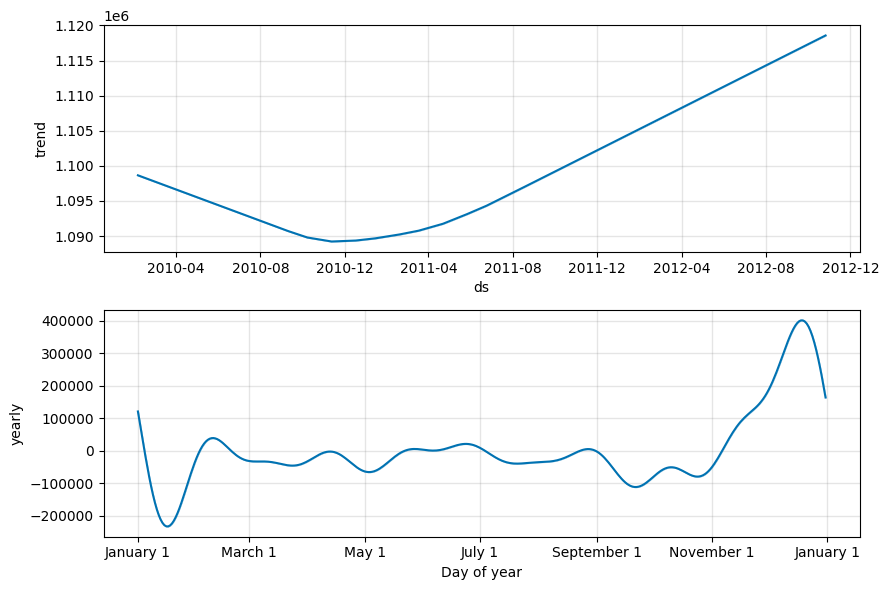

In [28]:
fig=model.plot_components(result)
plt.show()

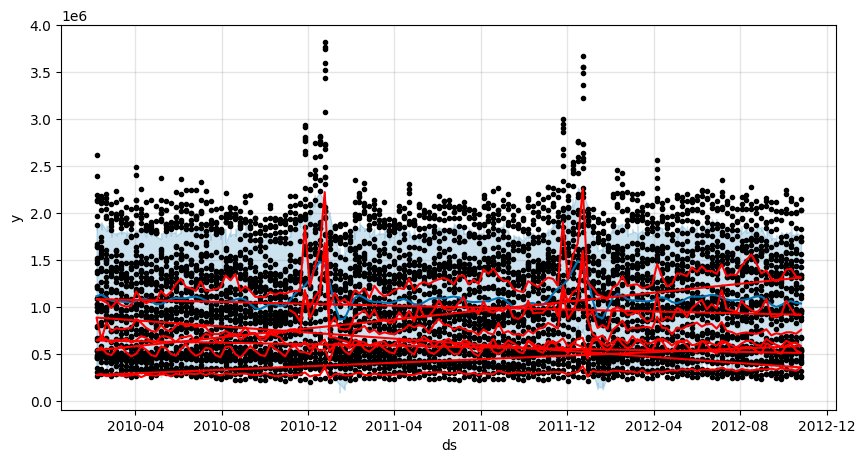

In [29]:
fig,ax=plt.subplots(figsize=(10,5))
fig=model.plot(result,ax=ax)
ax.plot(df_test['ds'],df_test['Weekly_Sales'],color='r')
plt.show()

In [32]:
mean_squared_error(df_test['Weekly_Sales'],result['yhat'])

234886622469.55035

In [33]:
future=model.make_future_dataframe(periods=819,freq='D',include_history=True)
forecast=model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,1.098652e+06,387043.958005,1.858050e+06,1.098652e+06,1.098652e+06,19057.204812,19057.204812,19057.204812,19057.204812,19057.204812,19057.204812,0.0,0.0,0.0,1.117710e+06
1,2010-02-12,1.098396e+06,470546.552292,1.873676e+06,1.098396e+06,1.098396e+06,35692.322875,35692.322875,35692.322875,35692.322875,35692.322875,35692.322875,0.0,0.0,0.0,1.134089e+06
2,2010-02-19,1.098141e+06,374942.098827,1.812146e+06,1.098141e+06,1.098141e+06,2409.510766,2409.510766,2409.510766,2409.510766,2409.510766,2409.510766,0.0,0.0,0.0,1.100550e+06
3,2010-02-26,1.097885e+06,381749.713812,1.830945e+06,1.097885e+06,1.097885e+06,-27018.474775,-27018.474775,-27018.474775,-27018.474775,-27018.474775,-27018.474775,0.0,0.0,0.0,1.070866e+06
4,2010-03-05,1.097629e+06,403160.194904,1.791424e+06,1.097629e+06,1.097629e+06,-33748.750560,-33748.750560,-33748.750560,-33748.750560,-33748.750560,-33748.750560,0.0,0.0,0.0,1.063880e+06


In [36]:
df_processed = df.rename(columns={'Date': 'ds'})
df_processed['ds'] = pd.to_datetime(df_processed['ds'], format='%d-%m-%Y')

final_df = df_processed.merge(forecast[['ds','yhat','yhat_lower','yhat_upper']], on='ds', how='left')
final_df.head()

,Store,ds,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,yhat,yhat_lower,yhat_upper
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1.117710e+06,387043.958005,1.858050e+06
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1.134089e+06,470546.552292,1.873676e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.100550e+06,374942.098827,1.812146e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.070866e+06,381749.713812,1.830945e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.063880e+06,403160.194904,1.791424e+06


In [37]:
final_df.to_csv('final_df.csv', index=False)